<a href="https://colab.research.google.com/github/fiaazwa/ujicoba/blob/main/DaapLearning02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Image Classification Pipeline with EfficientNetB7 on Google Colab
# Dataset structure assumed to be inside Google Drive as described

# ==================== 1. Import Necessary Libraries ====================
import os
import shutil
from sklearn.model_selection import train_test_split

In [27]:
# ==================== 2. Mount Google Drive ====================
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/Dataset_DeepLearning'

Mounted at /content/drive


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_DeepLearning/training',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_DeepLearning/val',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_DeepLearning/test',
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 1240 images belonging to 4 classes.
Found 180 images belonging to 4 classes.
Found 180 images belonging to 4 classes.


In [29]:
# ==================== 4. Placing Data into a Dataframe ====================
class_names = list(train_data.class_indices.keys())
print("Class labels:", class_names)

Class labels: ['gaun', 'jaket', 'kaos', 'kemeja']


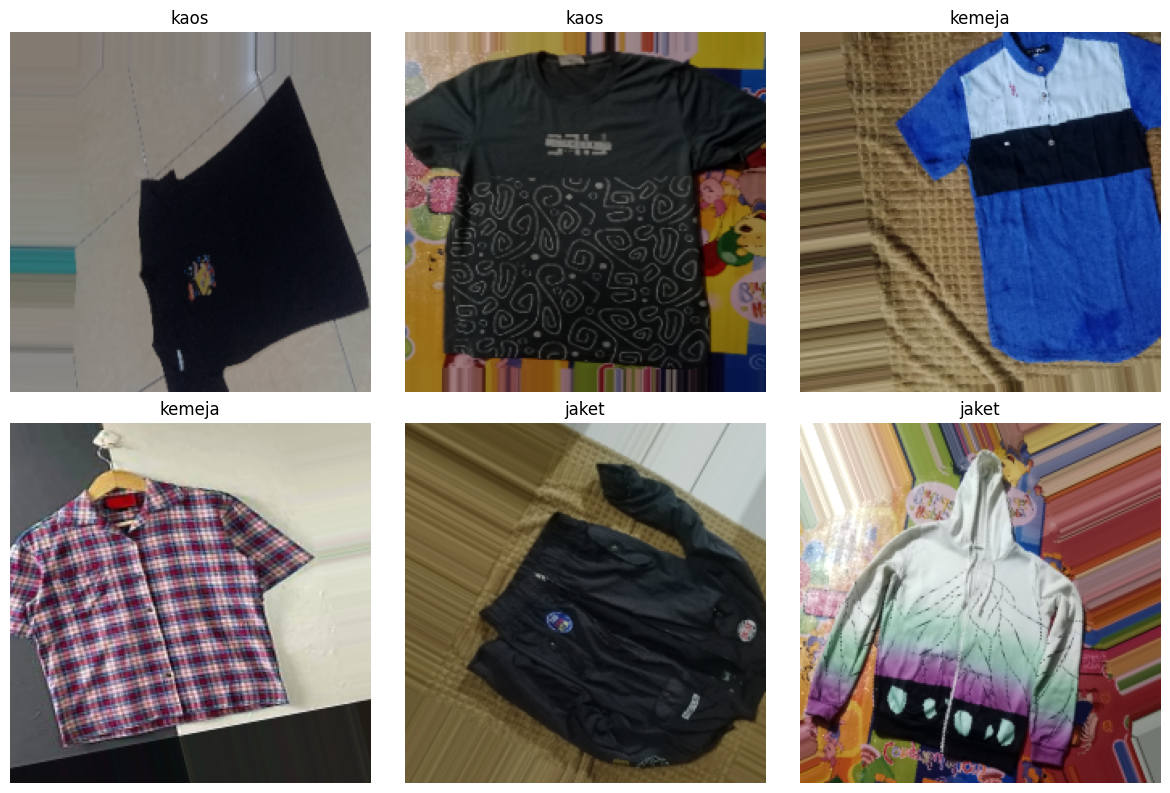

In [30]:
# ==================== 5. Visualizing Images from the Dataset ====================
def plot_images(data):
    images, labels = next(data)
    plt.figure(figsize=(12, 8))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(train_generator)

# def show_batch(loader):
#     images, labels = next(iter(loader))
#     plt.figure(figsize=(12,6))
#     for i in range(6):
#         plt.subplot(2,3,i+1)
#         img = images[i].permute(1,2,0).numpy()
#         plt.imshow(img)
#         plt.title(f"Label: {class_names[labels[i]]}")
#         plt.axis("off")
#     plt.tight_layout()
#     plt.show()

# show_batch(train_loader)


In [31]:
# ==================== 6. Building the Model ====================
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# ==================== 7. Callbacks ====================
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [33]:
# ==================== 8. Training the Model ====================
# class EarlyStopping:
#     def __init__(self, patience=3):
#         self.patience = patience
#         self.counter = 0
#         self.best_loss = float('inf')
#         self.early_stop = False

#     def __call__(self, val_loss):
#         if val_loss < self.best_loss:
#             self.best_loss = val_loss
#             self.counter = 0
#         else:
#             self.counter += 1
#             if self.counter >= self.patience:
#                 self.early_stop = True

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True, verbose=1
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2385 - loss: 1.5922 
Epoch 1: val_loss improved from inf to 1.38964, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 923s 22s/step - accuracy: 0.2386 - loss: 1.5908 - val_accuracy: 0.2500 - val_loss: 1.3896
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2754 - loss: 1.4077 
Epoch 2: val_loss improved from 1.38964 to 1.38715, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 841s 21s/step - accuracy: 0.2750 - loss: 1.4078 - val_accuracy: 0.2500 - val_loss: 1.3872
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2375 - loss: 1.3943 
Epoch 3: val_loss improved from 1.38715 to 1.38650, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 852s 22s/step - accuracy: 0.2375 - loss: 1.3943 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2362 - loss: 1.3900 
Epoch 4: val_loss did not improve from 1.38650
39/39 ━━━━━━━━━━━━━━━━━━━━ 843s 22s/step - accuracy: 0.2361 - loss: 1.3900 - val_accuracy: 0.2500 - val_loss: 1.3875
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2309 - loss: 1.3964 
Epoch 5: val_loss improved from 1.38650 to 1.38644, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 844s 22s/step - accuracy: 0.2311 - loss: 1.3964 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2482 - loss: 1.3857 
Epoch 6: val_loss improved from 1.38644 to 1.38642, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 844s 22s/step - accuracy: 0.2484 - loss: 1.3857 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2357 - loss: 1.3922 
Epoch 7: val_loss improved from 1.38642 to 1.38641, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 844s 22s/step - accuracy: 0.2355 - loss: 1.3922 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2441 - loss: 1.3872 
Epoch 8: val_loss improved from 1.38641 to 1.38630, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 850s 22s/step - accuracy: 0.2439 - loss: 1.3872 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2344 - loss: 1.3869 
Epoch 9: val_loss improved from 1.38630 to 1.38630, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 834s 21s/step - accuracy: 0.2346 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2531 - loss: 1.3861 
Epoch 10: val_loss did not improve from 1.38630
39/39 ━━━━━━━━━━━━━━━━━━━━ 885s 23s/step - accuracy: 0.2531 - loss: 1.3861 - val_accuracy: 0.2500 - val_loss: 1.3868
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2440 - loss: 1.3871 
Epoch 11: val_loss improved from 1.38630 to 1.38630, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 891s 23s/step - accuracy: 0.2441 - loss: 1.3872 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2543 - loss: 1.3873 
Epoch 12: val_loss did not improve from 1.38630
39/39 ━━━━━━━━━━━━━━━━━━━━ 841s 22s/step - accuracy: 0.2544 - loss: 1.3872 - val_accuracy: 0.2500 - val_loss: 1.3908
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2578 - loss: 1.3883 
Epoch 13: val_loss did not improve from 1.38630
39/39 ━━━━━━━━━━━━━━━━━━━━ 850s 22s/step - accuracy: 0.2577 - loss: 1.3883 - val_accuracy: 0.2500 - val_loss: 1.3873
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2485 - loss: 1.3853 
Epoch 14: val_loss improved from 1.38630 to 1.38569, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 840s 21s/step - accuracy: 0.2486 - loss: 1.3854 - val_accuracy: 0.2889 - val_loss: 1.3857
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2653 - loss: 1.3849 
Epoch 15: val_loss improved from 1.38569 to 1.38559, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 911s 23s/step - accuracy: 0.2650 - loss: 1.3849 - val_accuracy: 0.2778 - val_loss: 1.3856
Epoch 16/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2349 - loss: 1.3890 
Epoch 16: val_loss did not improve from 1.38559
39/39 ━━━━━━━━━━━━━━━━━━━━ 896s 23s/step - accuracy: 0.2348 - loss: 1.3890 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 17/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2713 - loss: 1.3860 
Epoch 17: val_loss did not improve from 1.38559
39/39 ━━━━━━━━━━━━━━━━━━━━ 833s 21s/step - accuracy: 0.2708 - loss: 1.3860 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 18/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2266 - loss: 1.3869 
Epoch 18: val_loss did not improve from 1.38559
39/39 ━━━━━━━━━━━━━━━━━━━━ 871s 22s/step - accuracy: 0.2267 - loss: 1.3869 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 19/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2399 - loss: 1.3903 
Epoch 19: val_loss did not improve from 1.38

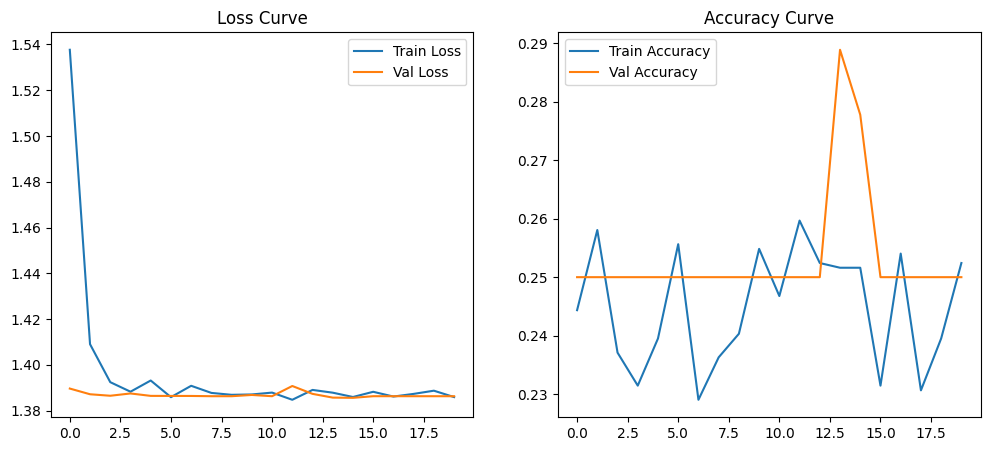

In [34]:
# ==================== 9. Visualizing Loss Curves ====================
def plot_curves(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')
    plt.show()

plot_curves(history)

180/180 ━━━━━━━━━━━━━━━━━━━━ 100s 496ms/step


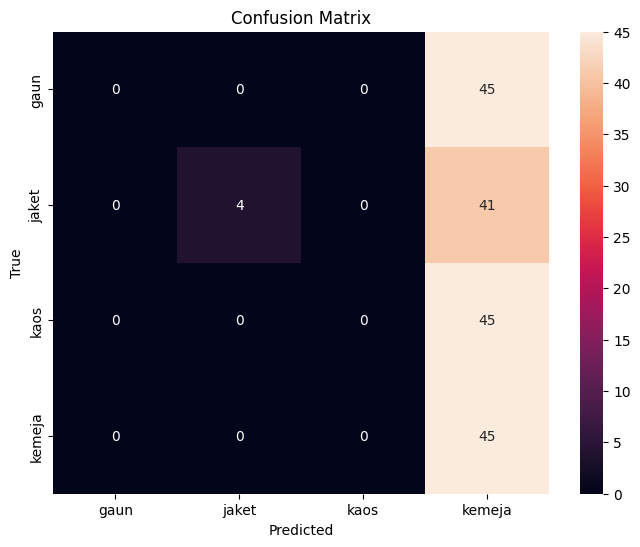

              precision    recall  f1-score   support

        gaun       0.00      0.00      0.00        45
       jaket       1.00      0.09      0.16        45
        kaos       0.00      0.00      0.00        45
      kemeja       0.26      1.00      0.41        45

    accuracy                           0.27       180
   macro avg       0.31      0.27      0.14       180
weighted avg       0.31      0.27      0.14       180



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# ==================== 10. Model Evaluation ====================
preds = model.predict(test_data)
y_true = test_data.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
def show_predictions():
    test_img_paths = test_data.filepaths[:6]
    plt.figure(figsize=(12, 8))
    for i, img_path in enumerate(test_img_paths):
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img)/255.
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[np.argmax(prediction)]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions()

In [ ]:
# ==================== 12. Grad-CAM Visualization ====================
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array / 255.0

img_path = test_data.filepaths[0]
img_array = get_img_array(img_path, (img_size, img_size))

grad_model = Model([model.inputs], [model.get_layer(index=-4).output, model.output])
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)[0]
pool_grads = tf.reduce_mean(grads, axis=(0, 1))
heatmap = tf.reduce_sum(tf.multiply(pool_grads, conv_outputs[0]), axis=-1)

heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = cv2.resize(heatmap.numpy(), (img_size, img_size))

img = cv2.imread(img_path)
img = cv2.resize(img, (img_size, img_size))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM')
plt.axis('off')
plt.show()